In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D, BatchNormalization

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print(x_test.shape)

(10000, 28, 28)


In [4]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


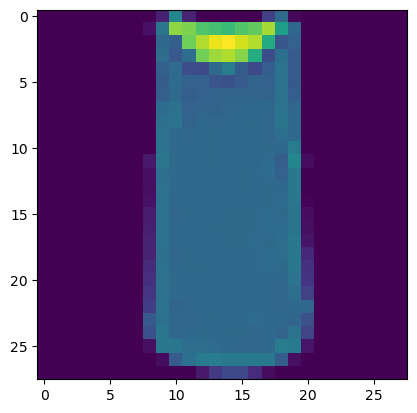

In [6]:
n=2
plt.imshow(x_train[n])
print(y_test[n])

In [7]:
model = keras.Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D((2,2), strides=2),
    Dropout(rate=0.5),
    Conv2D(32, (3,3), padding='valid', activation='relu'),
    AveragePooling2D((2,2), strides=2),
    Dropout(rate=0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [8]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                      

In [10]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size=30, epochs=5, validation_split=0.2)

Epoch 1/5
1600/1600 [==============================] - 21s 13ms/step - loss: 0.4233 - accuracy: 0.8484 - val_loss: 0.2988 - val_accuracy: 0.8919
Epoch 2/5
1600/1600 [==============================] - 21s 13ms/step - loss: 0.2938 - accuracy: 0.8924 - val_loss: 0.3305 - val_accuracy: 0.8730
Epoch 3/5
1600/1600 [==============================] - 21s 13ms/step - loss: 0.2538 - accuracy: 0.9051 - val_loss: 0.2582 - val_accuracy: 0.9057
Epoch 4/5
1600/1600 [==============================] - 22s 14ms/step - loss: 0.2285 - accuracy: 0.9149 - val_loss: 0.2603 - val_accuracy: 0.9057
Epoch 5/5
1600/1600 [==============================] - 21s 13ms/step - loss: 0.2110 - accuracy: 0.9220 - val_loss: 0.2286 - val_accuracy: 0.9186


In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2504 - accuracy: 0.9120


[0.25038599967956543, 0.9120000004768372]